# Pair programming Beautiful Soup
- Enunciado: Escribe una función llamada scrape_coches_ocasion que acepta una URL como argumento y devuelve un  
- DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. 
- La función realizará las siguientes tareas:





1. Realizará una solicitud HTTP GET a la siguiente url.




In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re 

2. Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará None.

In [2]:
url_coches = "https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2"
res_coches = requests.get(url_coches)
print(res_coches.status_code)

200


3. Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

b'<!DOCTYPE html><html><head><meta charSet="UTF-8" class="next-head"/><title class="next-head">Coches de segunda mano, ocasi\xc3\xb3n y seminuevos | OcasionPlus</title><meta name="description" content="4000 coches de ocasi\xc3\xb3n y segunda mano con descuentos de hasta 6000\xe2\x82\xac, la mejor relaci\xc3\xb3n calidad-precio garantizada." class="next-head"/><meta name="robots" content="noindex, follow, noarchive" class="next-head"/><meta name="viewport" content="width=device-width, initial-scale=1.0" class="next-head"/><link rel="shortcut icon" href="/static/favicon/favicon.ico" type="image/x-icon" class="next-head"/><link rel="apple-touch-icon" sizes="180x180" href="/static/favicon/apple-touch-icon.png" class="next-head"/><link rel="icon" type="image/png" sizes="32x32" href="/static/favicon/favicon-32x32.png" class="next-head"/><link rel="icon" type="image/png" sizes="194x194" href="/static/favicon/favicon-194x194.png" class="next-head"/><link rel="icon" type="image/png" sizes="192x
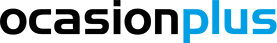

In [3]:
res_coches.content

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8" class="next-head"/>
  <title class="next-head">
   Coches de segunda mano, ocasión y seminuevos | OcasionPlus
  </title>
  <meta class="next-head" content="4000 coches de ocasión y segunda mano con descuentos de hasta 6000€, la mejor relación calidad-precio garantizada." name="description"/>
  <meta class="next-head" content="noindex, follow, noarchive" name="robots"/>
  <meta class="next-head" content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link class="next-head" href="/static/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link class="next-head" href="/static/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link class="next-head" href="/static/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link class="next-head" href="/static/favicon/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/>
  <link class="next-head" href="/static/f
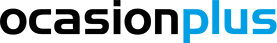

<!DOCTYPE html>
<html><head><meta charset="utf-8" class="next-head"/><title class="next-head">Coches de segunda mano, ocasión y seminuevos | OcasionPlus</title><meta class="next-head" content="4000 coches de ocasión y segunda mano con descuentos de hasta 6000€, la mejor relación calidad-precio garantizada." name="description"/><meta class="next-head" content="noindex, follow, noarchive" name="robots"/><meta class="next-head" content="width=device-width, initial-scale=1.0" name="viewport"/><link class="next-head" href="/static/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link class="next-head" href="/static/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/><link class="next-head" href="/static/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link class="next-head" href="/static/favicon/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/><link class="next-head" href="/static/favicon/android-chrome-192x192.png" rel=
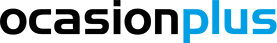

In [4]:
sopa_coches = BeautifulSoup(res_coches.content,"html.parser")
print(sopa_coches.prettify())
sopa_coches

In [5]:
# Buscamos nombre de coches (H2)
lista_nombre_coches = sopa_coches.find_all("h2",{"style":"overflow-x:hidden"})
lista_nombre_coches[:4]

[<h2 style="overflow-x:hidden">Toyota Yaris 1.0 Active (69 CV)</h2>,
 <h2 style="overflow-x:hidden">Audi A3 Sedan design edition 1.6 TDI (116 CV)</h2>,
 <h2 style="overflow-x:hidden">Volkswagen T-Cross Advance 1.0 TSI (110 CV)</h2>,
 <h2 style="overflow-x:hidden">Peugeot 2008 SUV PureTech 110 S&amp;S Allure EAT6 (110 CV)</h2>]

In [6]:
# Limpiamos solo a nombres:
lista_nombre_coches[0].text

'Toyota Yaris 1.0 Active (69 CV)'

In [7]:
nombre_coches = []
for nombre in lista_nombre_coches:
    nombre_coches.append(nombre.text)
nombre_coches[:4]

['Toyota Yaris 1.0 Active (69 CV)',
 'Audi A3 Sedan design edition 1.6 TDI (116 CV)',
 'Volkswagen T-Cross Advance 1.0 TSI (110 CV)',
 'Peugeot 2008 SUV PureTech 110 S&S Allure EAT6 (110 CV)']

In [8]:
# list comprehension

nombre_coches = [nombre.text for nombre in lista_nombre_coches]
nombre_coches[:4]

['Toyota Yaris 1.0 Active (69 CV)',
 'Audi A3 Sedan design edition 1.6 TDI (116 CV)',
 'Volkswagen T-Cross Advance 1.0 TSI (110 CV)',
 'Peugeot 2008 SUV PureTech 110 S&S Allure EAT6 (110 CV)']

In [9]:
# los Precios Rebajados:
lista_precios_rebajados = sopa_coches.find_all("span",{"class":"jsx-2689423372 price"})
lista_precios_rebajados[:4]

lista_precios_rebajados = [precio_rebajado.text for precio_rebajado in lista_precios_rebajados]
lista_precios_rebajados[:4]

['11.545€', '16.354€', '17.727€', '13.954€']

In [46]:
# los Precios Originales:
lista_precios_originales = sopa_coches.find_all("span",{"class":"jsx-2870186023 priceLast"})
lista_precios_originales[:4]

lista_precios_originales = [precio_original.text for precio_original in lista_precios_originales]
lista_precios_originales[:4]

['12.700€', '17.990€', '19.500€', '15.350€']

In [124]:
# los kilómetros recorridos:

def es_km(span):
    # print(span)
    # print(type(span))
    if span.find_all("img",{"alt":"KM"}) == []:   ## Se puede hacer: return span.find_all("img",{"alt":"KM"}) != []
        return False
    else:
        return True
    
lista_coches = sopa_coches.find_all("span", {"class":"jsx-3960002075 detail big"})
lista_kilómetros_todos = [dato_coche.text for dato_coche in lista_coches if es_km(dato_coche)]

print(lista_kilómetros_todos)


['24.859 km', '96.484 km', '23.814 km', '43.433 km', '67.389 km', '135.000 km', '126.249 km', '80.634 km', '90.197 km', '88.810 km', '13.497 km', '37.344 km', '110.805 km', '81.701 km', '32.336 km', '9.548 km', '4.015 km', '160.111 km', '119.595 km', '69.015 km']


4. Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:

- "coche": Nombres de los coches.
- "precio_rebajado": Precios rebajados.
- "precio_original": Precios originales.
- "km": Kilómetros recorridos

In [144]:
# nombre_coches[:4]
# lista_precios_rebajados[:4]
# lista_precios_originales[:4]
# lista_kilómetros_todos


# Función para unificar la información de cada datos que nos interesa de los coches

def data_coches(url_coches): 

    url_coches = "https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2"

    res_coches = requests.get(url_coches)

    sopa_coches = BeautifulSoup(res_coches.content,"html.parser")

    # Nombres de los coches
    lista_nombre_coches = sopa_coches.find_all("h2",{"style":"overflow-x:hidden"})
    lista_nombre_coches[:4]
    lista_nombre_coches[0].text
    nombre_coches = [nombre.text for nombre in lista_nombre_coches]
    nombre_coches_todos = nombre_coches[:4]

    # los Precios Rebajados:
    lista_precios_rebajados = sopa_coches.find_all("span",{"class":"jsx-2689423372 price"})
    lista_precios_rebajados[:4]

    lista_precios_rebajados = [precio_rebajado.text for precio_rebajado in lista_precios_rebajados]
    lista_precios_rebajados[:4]


    # los Precios Originales:
    lista_precios_originales = sopa_coches.find_all("span",{"class":"jsx-2870186023 priceLast"})
    lista_precios_originales[:4]

    lista_precios_originales = [precio_original.text for precio_original in lista_precios_originales]
    lista_precios_originales[:4]


    # los KM recorridos
    def es_km(span):
        # print(span)
        # print(type(span))
        if span.find_all("img",{"alt":"KM"}) == []:   ## Se puede hacer: return span.find_all("img",{"alt":"KM"}) != []
            return False
        else:
            return True
    lista_coches = sopa_coches.find_all("span", {"class":"jsx-3960002075 detail big"})
    lista_kilómetros_todos = [dato_coche.text for dato_coche in lista_coches if es_km(dato_coche)]


    return nombre_coches_todos, lista_precios_rebajados,lista_precios_originales,lista_kilómetros_todos



In [172]:
datos_coches_final = data_coches(url_coches)
df_coches = pd.DataFrame(datos_coches_final).transpose()[:4]
df_coches.columns = ["coche","precio_rebajado", "precio_original","km"]
df_coches

coche precio_rebajado  \
0           Toyota Avensis 150D Advance (143 CV)         15.363€   
1                Toyota Yaris 1.0 Active (69 CV)         11.545€   
2  Audi A3 Sedan design edition 1.6 TDI (116 CV)         16.354€   
3    Volkswagen T-Cross Advance 1.0 TSI (110 CV)         17.727€   

  precio_original         km  
0         16.900€  88.032 km  
1         12.700€  24.859 km  
2         17.990€  96.484 km  
3         19.500€  23.814 km